# EDA Washing Machine

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import re
import missingno as msno
from pandas_profiling import ProfileReport
import random

In [3]:
wm = pd.read_csv(r"D:\Final_upated_Flipkart_washing_machine.csv")
wm.head()

Unnamed: 0                                               Name      Brand  \
0           0  SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...    SAMSUNG   
1           1  Candes 6.5 kg Semi Automatic Top Load Red, Whi...     Candes   
2           2  SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...    SAMSUNG   
3           3  SAMSUNG 7.2 kg with Double Storm Technology Se...    SAMSUNG   
4           4  Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...  Whirlpool   

                               Model  Rating            FType        Load  \
0                     WW60R20GLMA/TL     4.4  Fully Automatic  Front Load   
1                        CTPL65PLSWM     4.8   Semi Automatic    Top Load   
2                     WA65A4002VS/TL     4.4  Fully Automatic    Top Load   
3                  WT725QPNDMPXTL 02     4.4   Semi Automatic    Top Load   
4  SUPERB ATOM 70S GREY DAZZLE (5YR)     4.4   Semi Automatic    Top Load   

  WashingCapacity             WashingMethod SpinSpeed Built_In_Heater  \
0            6 kg                    Tumble  1000 rpm             Yes   
1          6.5 kg                  Pulsator  1500 rpm              No   
2          6.5 kg                  Pulsator   680 rpm              No   
3          7.2 kg  Centre Jet Pulsator Wash   740 rpm              No   
4            7 kg             Impellar Wash  1450 rpm              No   

                     Dryer  EnergyRating  Price  
0                      NaN           5.0  22399  
1               Spin Dryer           5.0   6799  
2                      NaN           3.0  14499  
3  Air Turbo Drying System           NaN   9699  
4                      NaN           5.0  10240

In [4]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       761 non-null    int64  
 1   Name             761 non-null    object 
 2   Brand            761 non-null    object 
 3   Model            761 non-null    object 
 4   Rating           623 non-null    float64
 5   FType            755 non-null    object 
 6   Load             723 non-null    object 
 7   WashingCapacity  760 non-null    object 
 8   WashingMethod    759 non-null    object 
 9   SpinSpeed        758 non-null    object 
 10  Built_In_Heater  761 non-null    object 
 11  Dryer            195 non-null    object 
 12  EnergyRating     411 non-null    float64
 13  Price            761 non-null    int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 83.4+ KB


In [5]:
wm.drop('Unnamed: 0', inplace=True, axis=1)

<AxesSubplot:>

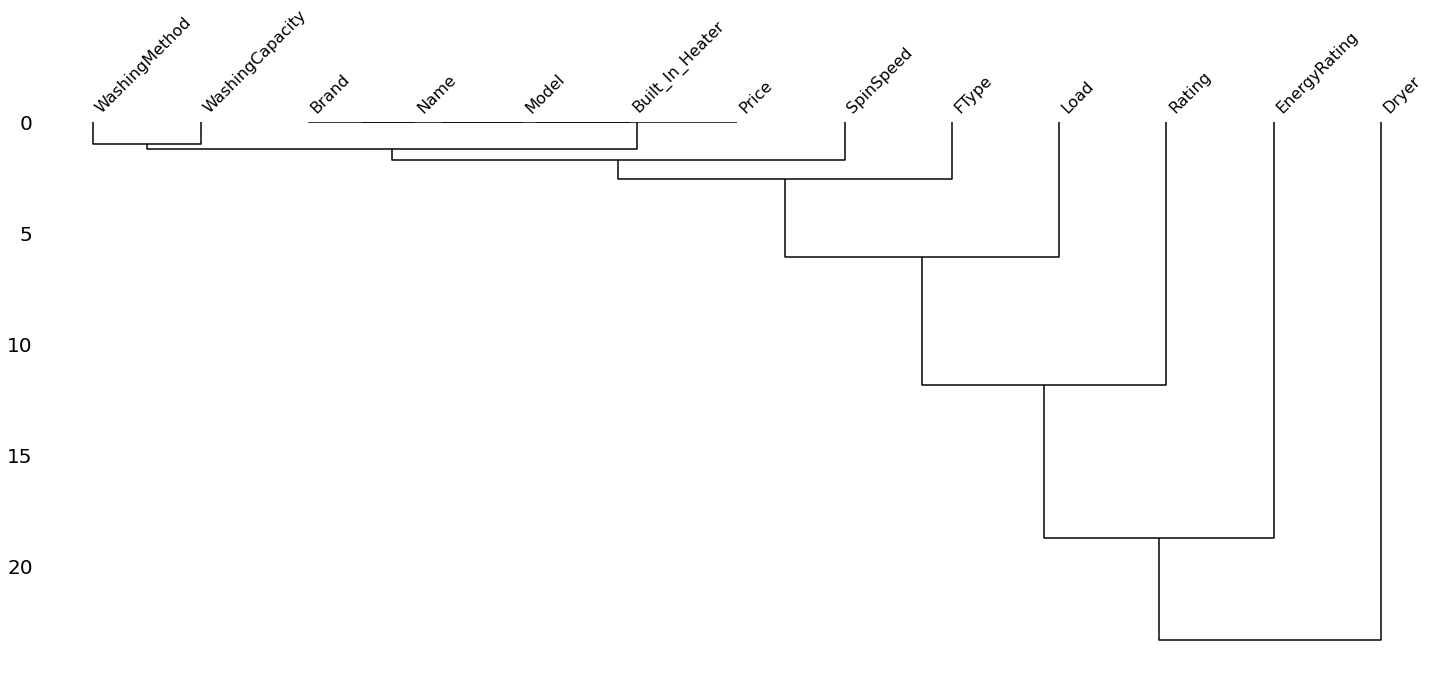

In [6]:
import missingno as msno 
msno.dendrogram(wm)

<AxesSubplot:>

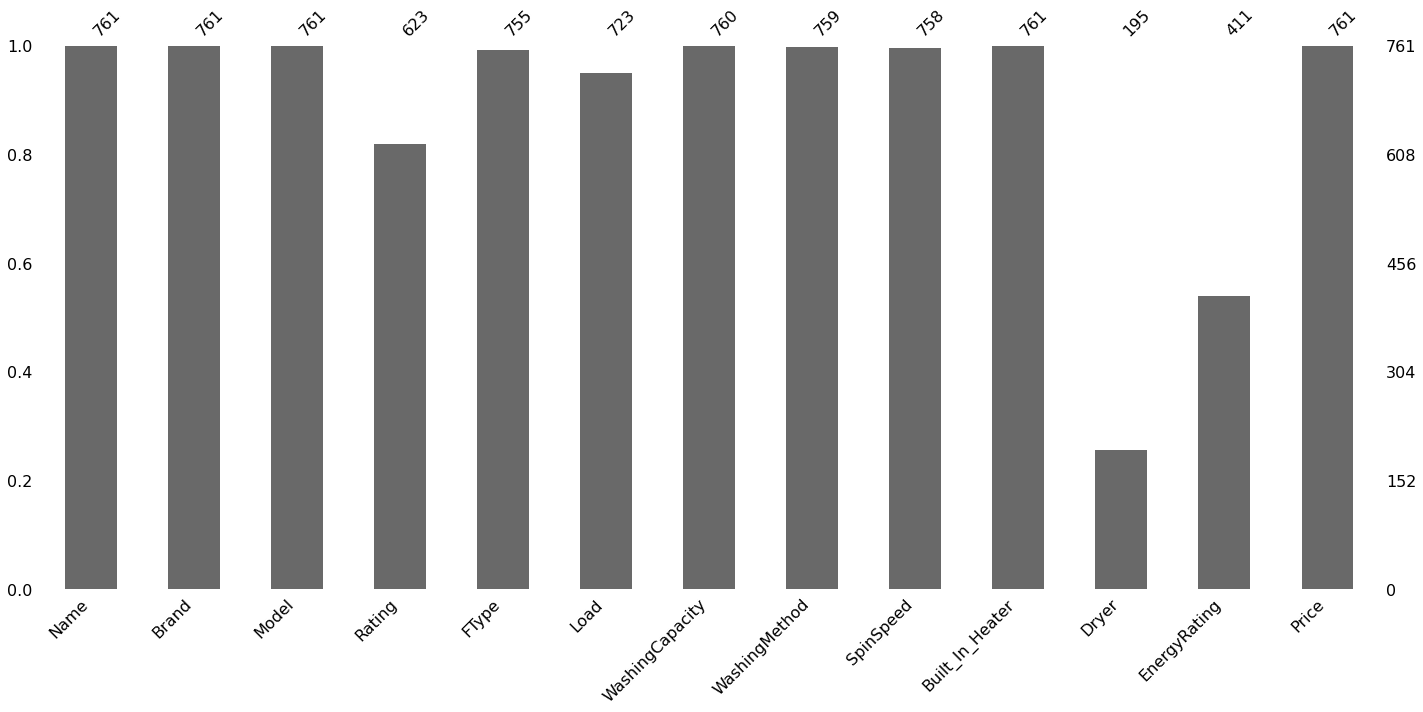

In [7]:
msno.bar(wm)

<AxesSubplot:>

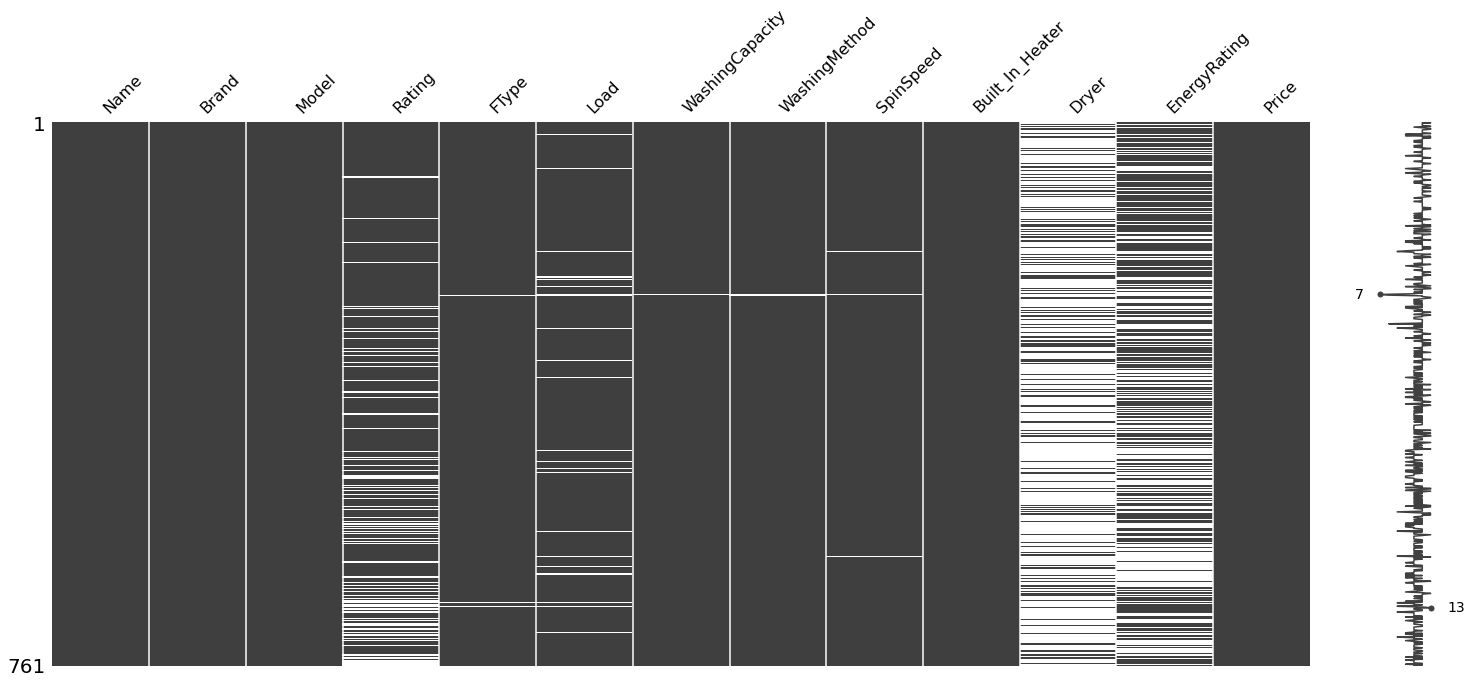

In [8]:
msno.matrix(wm)

In [9]:
wm.isnull().sum()

Name                 0
Brand                0
Model                0
Rating             138
FType                6
Load                38
WashingCapacity      1
WashingMethod        2
SpinSpeed            3
Built_In_Heater      0
Dryer              566
EnergyRating       350
Price                0
dtype: int64

In [10]:
wm.head()

Name      Brand  \
0  SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...    SAMSUNG   
1  Candes 6.5 kg Semi Automatic Top Load Red, Whi...     Candes   
2  SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...    SAMSUNG   
3  SAMSUNG 7.2 kg with Double Storm Technology Se...    SAMSUNG   
4  Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...  Whirlpool   

                               Model  Rating            FType        Load  \
0                     WW60R20GLMA/TL     4.4  Fully Automatic  Front Load   
1                        CTPL65PLSWM     4.8   Semi Automatic    Top Load   
2                     WA65A4002VS/TL     4.4  Fully Automatic    Top Load   
3                  WT725QPNDMPXTL 02     4.4   Semi Automatic    Top Load   
4  SUPERB ATOM 70S GREY DAZZLE (5YR)     4.4   Semi Automatic    Top Load   

  WashingCapacity             WashingMethod SpinSpeed Built_In_Heater  \
0            6 kg                    Tumble  1000 rpm             Yes   
1          6.5 kg                  Pulsator  1500 rpm              No   
2          6.5 kg                  Pulsator   680 rpm              No   
3          7.2 kg  Centre Jet Pulsator Wash   740 rpm              No   
4            7 kg             Impellar Wash  1450 rpm              No   

                     Dryer  EnergyRating  Price  
0                      NaN           5.0  22399  
1               Spin Dryer           5.0   6799  
2                      NaN           3.0  14499  
3  Air Turbo Drying System           NaN   9699  
4                      NaN           5.0  10240

In [11]:
wm.dropna(subset=['FType','Load'], how='all',inplace=True)

In [12]:
wm.isnull().sum()

Name                 0
Brand                0
Model                0
Rating             133
FType                0
Load                32
WashingCapacity      1
WashingMethod        1
SpinSpeed            3
Built_In_Heater      0
Dryer              561
EnergyRating       347
Price                0
dtype: int64

In [13]:
wm.Load.value_counts()

Top Load      529
Front Load    194
Name: Load, dtype: int64

In [14]:
wm['Load'].fillna('Top Load', inplace=True)
wm.Load.isnull().sum()

0

In [15]:
wm.Rating.value_counts()

4.4    203
4.3    133
4.2     79
4.5     48
4.1     37
4.0     28
4.8     15
4.6     12
3.9     10
5.0      8
3.7      8
4.7      7
3.8      7
3.5      5
3.6      4
2.7      4
4.9      3
3.4      2
3.3      2
1.0      2
3.0      2
3.2      2
2.5      1
Name: Rating, dtype: int64

In [16]:
m = wm.Rating.mean()
m

4.275884244373002

In [17]:
wm['Rating'].fillna(round(random.uniform(3.0,3.5),1), inplace=True)
wm.head()


Name      Brand  \
0  SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...    SAMSUNG   
1  Candes 6.5 kg Semi Automatic Top Load Red, Whi...     Candes   
2  SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...    SAMSUNG   
3  SAMSUNG 7.2 kg with Double Storm Technology Se...    SAMSUNG   
4  Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...  Whirlpool   

                               Model  Rating            FType        Load  \
0                     WW60R20GLMA/TL     4.4  Fully Automatic  Front Load   
1                        CTPL65PLSWM     4.8   Semi Automatic    Top Load   
2                     WA65A4002VS/TL     4.4  Fully Automatic    Top Load   
3                  WT725QPNDMPXTL 02     4.4   Semi Automatic    Top Load   
4  SUPERB ATOM 70S GREY DAZZLE (5YR)     4.4   Semi Automatic    Top Load   

  WashingCapacity             WashingMethod SpinSpeed Built_In_Heater  \
0            6 kg                    Tumble  1000 rpm             Yes   
1          6.5 kg                  Pulsator  1500 rpm              No   
2          6.5 kg                  Pulsator   680 rpm              No   
3          7.2 kg  Centre Jet Pulsator Wash   740 rpm              No   
4            7 kg             Impellar Wash  1450 rpm              No   

                     Dryer  EnergyRating  Price  
0                      NaN           5.0  22399  
1               Spin Dryer           5.0   6799  
2                      NaN           3.0  14499  
3  Air Turbo Drying System           NaN   9699  
4                      NaN           5.0  10240

In [18]:
wm.isnull().sum()

Name                 0
Brand                0
Model                0
Rating               0
FType                0
Load                 0
WashingCapacity      1
WashingMethod        1
SpinSpeed            3
Built_In_Heater      0
Dryer              561
EnergyRating       347
Price                0
dtype: int64

In [19]:
wm.dropna(subset=['SpinSpeed','Dryer','EnergyRating'], how='all',inplace=True)

In [20]:
def numbers(element):
    return "".join(filter(str.isnumeric, element))

wm['SpinSpeed'] = [numbers(x) for x in wm.SpinSpeed]
wm.SpinSpeed = pd.to_numeric(wm.SpinSpeed)



In [21]:
wm.WashingCapacity = [x.strip('kg') for x in wm.WashingCapacity]
wm.WashingCapacity = pd.to_numeric(wm.WashingCapacity)

In [22]:
wm.head()

Name      Brand  \
0  SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...    SAMSUNG   
1  Candes 6.5 kg Semi Automatic Top Load Red, Whi...     Candes   
2  SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...    SAMSUNG   
3  SAMSUNG 7.2 kg with Double Storm Technology Se...    SAMSUNG   
4  Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...  Whirlpool   

                               Model  Rating            FType        Load  \
0                     WW60R20GLMA/TL     4.4  Fully Automatic  Front Load   
1                        CTPL65PLSWM     4.8   Semi Automatic    Top Load   
2                     WA65A4002VS/TL     4.4  Fully Automatic    Top Load   
3                  WT725QPNDMPXTL 02     4.4   Semi Automatic    Top Load   
4  SUPERB ATOM 70S GREY DAZZLE (5YR)     4.4   Semi Automatic    Top Load   

   WashingCapacity             WashingMethod  SpinSpeed Built_In_Heater  \
0              6.0                    Tumble       1000             Yes   
1              6.5                  Pulsator       1500              No   
2              6.5                  Pulsator        680              No   
3              7.2  Centre Jet Pulsator Wash        740              No   
4              7.0             Impellar Wash       1450              No   

                     Dryer  EnergyRating  Price  
0                      NaN           5.0  22399  
1               Spin Dryer           5.0   6799  
2                      NaN           3.0  14499  
3  Air Turbo Drying System           NaN   9699  
4                      NaN           5.0  10240

In [23]:
wm.isnull().sum()

Name                 0
Brand                0
Model                0
Rating               0
FType                0
Load                 0
WashingCapacity      0
WashingMethod        0
SpinSpeed            0
Built_In_Heater      0
Dryer              558
EnergyRating       344
Price                0
dtype: int64

In [24]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 760
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             752 non-null    object 
 1   Brand            752 non-null    object 
 2   Model            752 non-null    object 
 3   Rating           752 non-null    float64
 4   FType            752 non-null    object 
 5   Load             752 non-null    object 
 6   WashingCapacity  752 non-null    float64
 7   WashingMethod    752 non-null    object 
 8   SpinSpeed        752 non-null    int64  
 9   Built_In_Heater  752 non-null    object 
 10  Dryer            194 non-null    object 
 11  EnergyRating     408 non-null    float64
 12  Price            752 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 82.2+ KB


In [25]:
wm.Dryer.value_counts()

Spin Dry                      98
Air Dry                       34
Air Turbo Drying System       20
Swift Dry                     15
Spin Dryer                     9
Spin                           4
Condenser Drying               3
Wind Jet Dry                   2
Plastic Spin Dryer             1
70 % Air Dryer                 1
Stainless Steel Spin Dryer     1
Hot Wind                       1
Turbo Dry                      1
Turbo Air Dry                  1
No                             1
Spin Air Dry                   1
Max Dry                        1
Name: Dryer, dtype: int64

In [26]:
wm.Dryer.value_counts()

Spin Dry                      98
Air Dry                       34
Air Turbo Drying System       20
Swift Dry                     15
Spin Dryer                     9
Spin                           4
Condenser Drying               3
Wind Jet Dry                   2
Plastic Spin Dryer             1
70 % Air Dryer                 1
Stainless Steel Spin Dryer     1
Hot Wind                       1
Turbo Dry                      1
Turbo Air Dry                  1
No                             1
Spin Air Dry                   1
Max Dry                        1
Name: Dryer, dtype: int64

In [27]:
wm.WashingMethod.value_counts()

Pulsator                             296
Tumble                               104
Tumble Wash                           71
Pulsator Wash                         47
Center Jet Pulsator Wash              22
                                    ... 
Bubble Wash                            1
Double Action Pulsator Wash            1
Hexafin Pulsator Wash                  1
PULSE                                  1
Agipeller with 3D Scrub Pads Wash      1
Name: WashingMethod, Length: 74, dtype: int64

In [28]:
wm.loc[(wm.Dryer.isnull())&(wm.FType=='Washer only'),'Dryer']="No Dryer"

In [29]:
wm.loc[(wm.Dryer.isnull())&(wm.Brand=='LG'),'Dryer']="Air Dry"
wm.loc[(wm.Dryer.isnull())&(wm.Brand=='LLoyd'),'Dryer']="Air Dry"
wm.loc[(wm.Dryer.isnull())&(wm.Brand=='SAMSUNG'),'Dryer']="Air Dry"


In [30]:
wm.Dryer.fillna("Spin Dry", inplace= True)

In [31]:
wm['Dryer'] = wm['Dryer'].replace("No", "No Dryer")
wm['Dryer'] = wm['Dryer'].replace(["Air Turbo Drying System","Swift Dry","Condenser Drying","Wind Jet Dry",
                                  "Hot Wind","Turbo Air Dry","Turbo Dry","70 % Air Dryer","Max Dry"]
                                  ,"Air Dry")



In [32]:
wm['Dryer'] = wm['Dryer'].replace(["Spin Air Dry","Spin Dryer","Spin","Plastic Spin Dryer","Stainless Steel Spin Dryer"] 
                                  ,"Spin Dry")


In [33]:
wm.isnull().sum()

Name                 0
Brand                0
Model                0
Rating               0
FType                0
Load                 0
WashingCapacity      0
WashingMethod        0
SpinSpeed            0
Built_In_Heater      0
Dryer                0
EnergyRating       344
Price                0
dtype: int64

In [34]:
ss = 0
p = 0
while p in wm['Price'] and ss in wm['SpinSpeed']:
  if p>16000 and ss>1000:
    wm['EnergyRating'].fillna(5, inplace= True)
  elif p>=10000 and (ss<1000 and ss>700):
    wm['EnergyRating'].fillna(4, inplace= True)
  else:
    wm['EnergyRating'].fillna(3, inplace= True)
  ss += 1
  p += 1

In [35]:
wm.EnergyRating.value_counts()

5.0    398
3.0    349
4.0      5
Name: EnergyRating, dtype: int64

In [36]:
wm.isnull().sum()

Name               0
Brand              0
Model              0
Rating             0
FType              0
Load               0
WashingCapacity    0
WashingMethod      0
SpinSpeed          0
Built_In_Heater    0
Dryer              0
EnergyRating       0
Price              0
dtype: int64

In [37]:
wm.WashingMethod.value_counts()

Pulsator                             296
Tumble                               104
Tumble Wash                           71
Pulsator Wash                         47
Center Jet Pulsator Wash              22
                                    ... 
Bubble Wash                            1
Double Action Pulsator Wash            1
Hexafin Pulsator Wash                  1
PULSE                                  1
Agipeller with 3D Scrub Pads Wash      1
Name: WashingMethod, Length: 74, dtype: int64

In [38]:
wm.WashingMethod.unique()

array(['Tumble', 'Pulsator', 'Centre Jet Pulsator Wash', 'Impellar Wash',
       'Agipellar', 'Normal Pulsator Wash', 'Center Jet Pulsator Wash',
       '3 Smart Motion', 'Agipeller', 'Pulsator Wash', 'Tumble Wash',
       'Impeller', 'Balance Clean Pulsator', 'Impellar',
       'Triadic Pulsator', 'Hexa Bloom Impeller Wash',
       'Spa Wash with 3D Scrub Technology Wash', 'Agipellar Wash',
       'Agitator', 'Cross Pulsator', '3D Turbo Impeller Wash',
       'PLUS HEATER', 'Impeller Wash', 'Roller Jet Pulsator',
       'Wobble Pulsator', 'Pulastor', 'Buzzer', 'Triadic Pulsator Wash',
       'PULSE', 'Special Pulsator', '6 Motion DD Wash', 'pulsator',
       'Aquajet Pulsator Wash', 'Punch+ 3 Pulsator',
       'Supersoak Technology', 'Tri-Roto Scrub Pulsator',
       'Double Action Pulsator Wash', 'Storm Pulsator Wash',
       'Normal Wash', 'Punch + 3 Pulsator Wash', '3D Scrub Technology',
       'Delicate, Normal and Heavy, Impellar', '6 Motion Direct Drive',
       'TUMBLE WASH', '

In [39]:
wm['WashingMethod'] = wm['WashingMethod'].replace(["Tumble","TUMBLE","TUMBLE WASH"],"Tumble Wash")

wm['WashingMethod'] = wm['WashingMethod'].replace(
    ["Pulsator","Center Jet Pulsator Wash","Multi Pulsator","Double Action Pulsator Wash",
     "Balance Clean Pulsator","Hexapin Pulsator","Tri-roto Scrub Pulsator Wash","Triadic Pulsator",
    "Tri-Roto Scrub Pulsator","Centre Jet Pulsator Wash","PULSATOR","Punch+ 3 Pulsator","Cross Pulsator",
    "Deep Plate Pulsator Wash", "Hexafin Pulsator Wash","5 Mini Pulsator","PULSATOR","Punch + 3 Pulsator",
     "STS Pulsator Wash","Dual Color Vortex Pulsator Wash","Wobble Pulsator Wash","Tristorm Pulsator Wash",
    "pulsator","Roller Jet Pulsator","Triadic Pulsator Wash","Storm Pulsator Wash","Wobble Pulsator",
    "Punch + 3 Pulsator Wash","Aquajet Pulsator Wash","Pulastor","Normal Pulsator Wash","Special Pulsator"],
                                                  "Pulsator Wash")


In [40]:
wm['WashingMethod'] = wm['WashingMethod'].replace(
    ["Agipeller Wash","Agipeller","Agipellar","Agipellar Wash","Agitator"],
                                                  
                                                  "Agitator Wash")

In [41]:
wm['WashingMethod'] = wm['WashingMethod'].replace(
    ["5 - 3D Turbo Impeller Wash","Delicate, Normal and Heavy, Impellar","Hexa Bloom Impeller Wash",
    "3D Turbo Impeller Wash","Impeller","Impellar","Impellar Wash"],
                                                  
                                                  "Impeller Wash")

In [42]:
wm['WashingMethod'] = wm['WashingMethod'].replace(
    ["FULLY AUTOMATIC","Normal, Quick, Gentle & Intensive Wash","Spa Wash with 3D Scrub Technology Wash",
    "Soak Wash","6 Motion Direct Drive","Foam Wash","Bubble Wash","3 Smart Motion","PULSE","3D Scrub Wash",
    "Buzzer","6 Motion Direct Drive Wash","Wobble","Agipeller with 3D Scrub Pads Wash","Fully Automatic",
    "3D Scrub Technology","Normal, Wool, Underwear, Jeans, Duvet, Eco, Gentle and Quick Wash","SPIN","3D",
    "Supersoak Technology","Automatic Wash","6 Motion DD Wash","Active Foam Wash","Normal Wash","PLUS HEATER"],
                                                  
                                                  "Others")

In [43]:
wm.isnull().sum()

Name               0
Brand              0
Model              0
Rating             0
FType              0
Load               0
WashingCapacity    0
WashingMethod      0
SpinSpeed          0
Built_In_Heater    0
Dryer              0
EnergyRating       0
Price              0
dtype: int64

In [44]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 760
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             752 non-null    object 
 1   Brand            752 non-null    object 
 2   Model            752 non-null    object 
 3   Rating           752 non-null    float64
 4   FType            752 non-null    object 
 5   Load             752 non-null    object 
 6   WashingCapacity  752 non-null    float64
 7   WashingMethod    752 non-null    object 
 8   SpinSpeed        752 non-null    int64  
 9   Built_In_Heater  752 non-null    object 
 10  Dryer            752 non-null    object 
 11  EnergyRating     752 non-null    float64
 12  Price            752 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 98.4+ KB


In [45]:
wm.head()

Name      Brand  \
0  SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...    SAMSUNG   
1  Candes 6.5 kg Semi Automatic Top Load Red, Whi...     Candes   
2  SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...    SAMSUNG   
3  SAMSUNG 7.2 kg with Double Storm Technology Se...    SAMSUNG   
4  Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...  Whirlpool   

                               Model  Rating            FType        Load  \
0                     WW60R20GLMA/TL     4.4  Fully Automatic  Front Load   
1                        CTPL65PLSWM     4.8   Semi Automatic    Top Load   
2                     WA65A4002VS/TL     4.4  Fully Automatic    Top Load   
3                  WT725QPNDMPXTL 02     4.4   Semi Automatic    Top Load   
4  SUPERB ATOM 70S GREY DAZZLE (5YR)     4.4   Semi Automatic    Top Load   

   WashingCapacity  WashingMethod  SpinSpeed Built_In_Heater     Dryer  \
0              6.0    Tumble Wash       1000             Yes   Air Dry   
1              6.5  Pulsator Wash       1500              No  Spin Dry   
2              6.5  Pulsator Wash        680              No   Air Dry   
3              7.2  Pulsator Wash        740              No   Air Dry   
4              7.0  Impeller Wash       1450              No  Spin Dry   

   EnergyRating  Price  
0           5.0  22399  
1           5.0   6799  
2           3.0  14499  
3           3.0   9699  
4           5.0  10240

In [46]:
cor = wm.corr()
cor

Rating  WashingCapacity  SpinSpeed  EnergyRating     Price
Rating           1.000000        -0.106283  -0.054590      0.046530 -0.227607
WashingCapacity -0.106283         1.000000   0.291728     -0.000389  0.262029
SpinSpeed       -0.054590         0.291728   1.000000      0.161280  0.090839
EnergyRating     0.046530        -0.000389   0.161280      1.000000  0.014039
Price           -0.227607         0.262029   0.090839      0.014039  1.000000

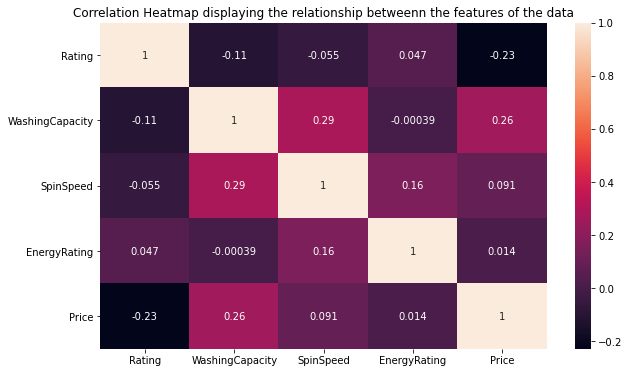

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True) 
plt.title('Correlation Heatmap displaying the relationship betweenn the features of the data')
plt.show()

In [49]:
#wm.to_excel("Final WM Data.xlsx")

In [50]:
#wm.to_csv("Final WM Data.csv")

histogram
boxplot
distplot
correltaion(heatmap)
box

### Data Visualisation:

In [51]:
display(wm.describe().round(2))

Rating  WashingCapacity  SpinSpeed  EnergyRating     Price
count  752.00           752.00     752.00        752.00    752.00
mean     4.07             7.48    1056.88          4.07  20525.68
std      0.55             1.33     305.03          1.00  11270.95
min      1.00             3.00     300.00          3.00   4990.00
25%      4.00             6.50     740.00          3.00  12797.50
50%      4.30             7.00    1000.00          5.00  16897.00
75%      4.40             8.00    1350.00          5.00  26569.00
max      5.00            18.00    1600.00          5.00  69990.00

#### Univariate:

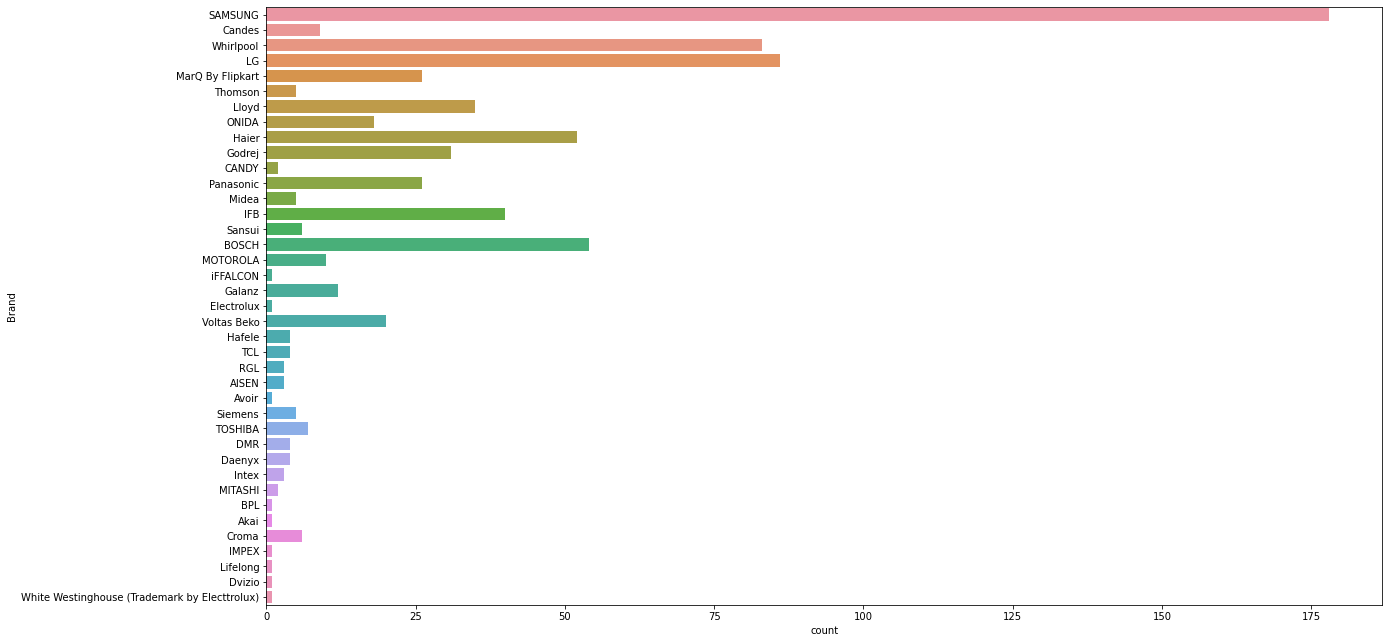

In [52]:
plt.figure(figsize=(20, 11))
sns.countplot(y=wm.Brand)
plt.show()

Most of the Machines are from Samsung.
And the least ftom Impex,BP, Lifelong(Basically Local Companies), startup companies.

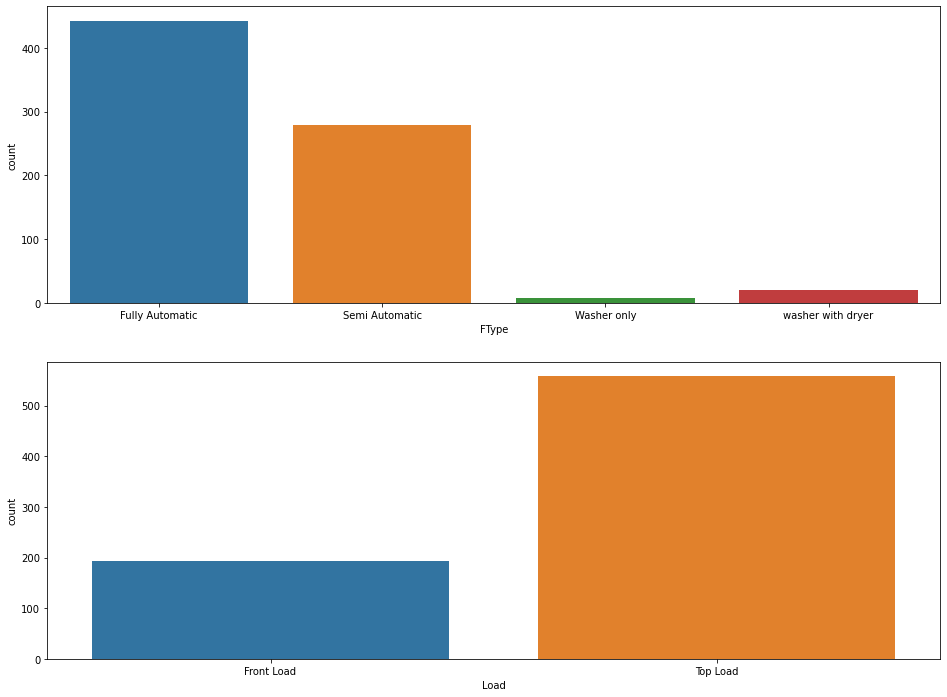

<Figure size 432x288 with 0 Axes>

In [53]:
fig, ax = plt.subplots(2,1 ,figsize= (16,12))
sns.countplot(x=wm.FType, ax=ax[0])
sns.countplot(x=wm.Load, ax=ax[1])
plt.show()
plt.tight_layout()

Mosty of the Washing machines are fullyautomatic And majority are also Topload. (This might be due to the fact that front loads take more space and not well suited for Indian Households.)

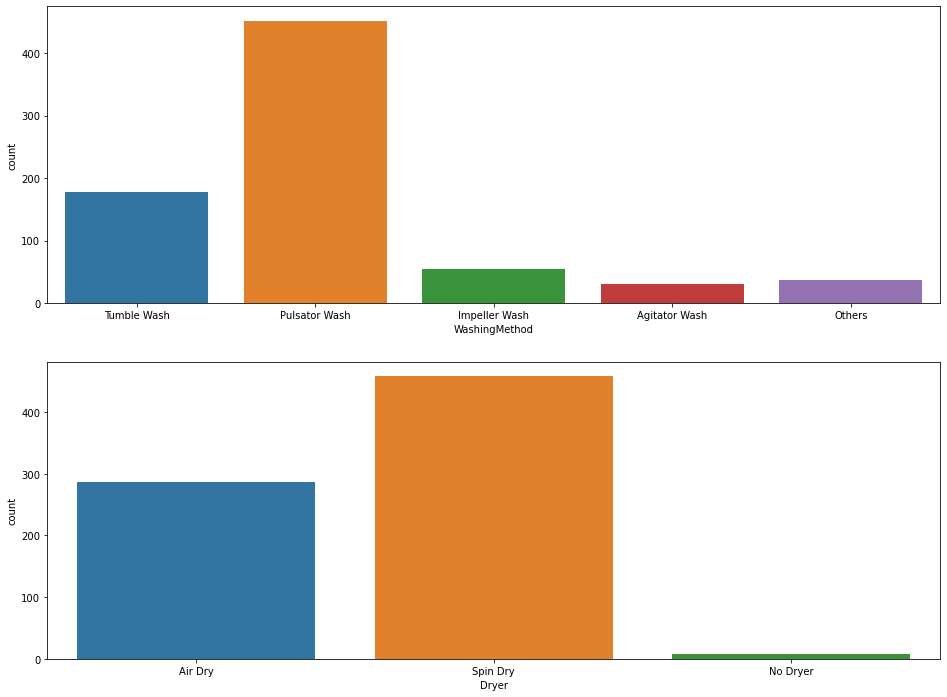

<Figure size 432x288 with 0 Axes>

In [54]:
fig, ax = plt.subplots(2,1 ,figsize= (16,12))
sns.countplot(x=wm.WashingMethod, ax=ax[0])
sns.countplot(x=wm.Dryer, ax=ax[1])
plt.show()
plt.tight_layout()

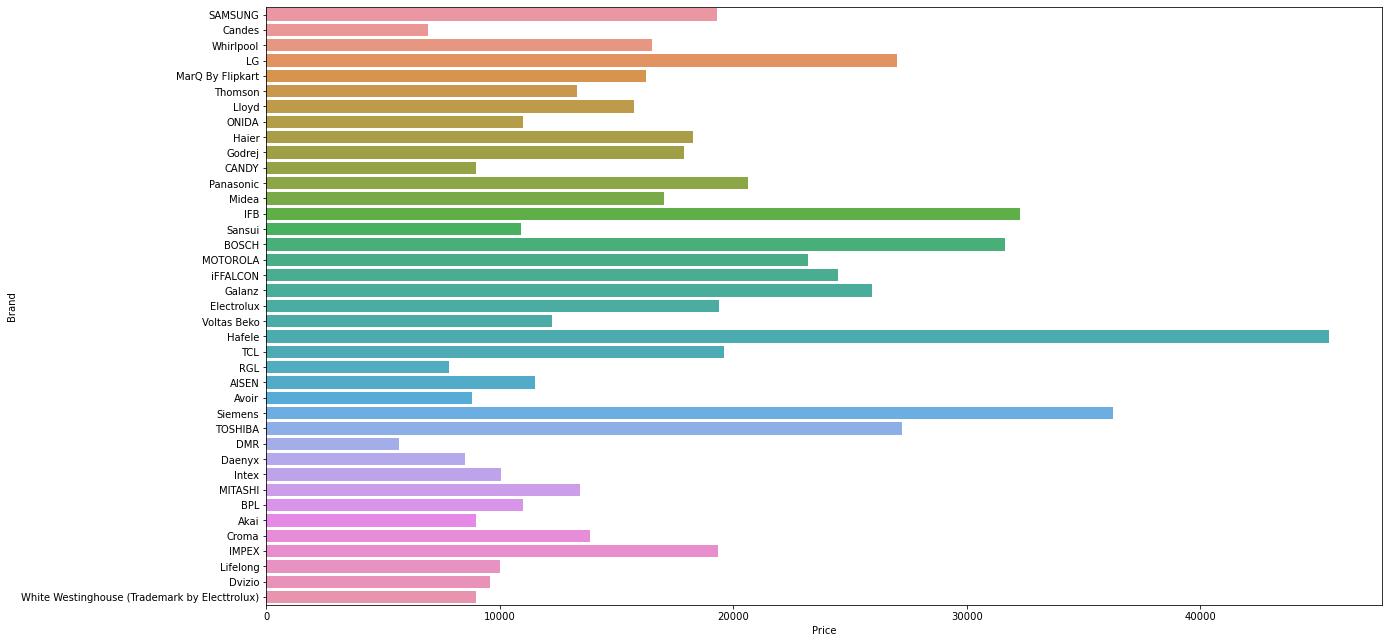

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(20, 11))
sns.barplot(y='Brand',x='Price',data=wm,ci= 0)
plt.show()
plt.tight_layout()

Washing Machines by Hafele are most in price.

count      752.000000
mean     20525.678191
std      11270.951178
min       4990.000000
25%      12797.500000
50%      16897.000000
75%      26569.000000
max      69990.000000
Name: Price, dtype: float64


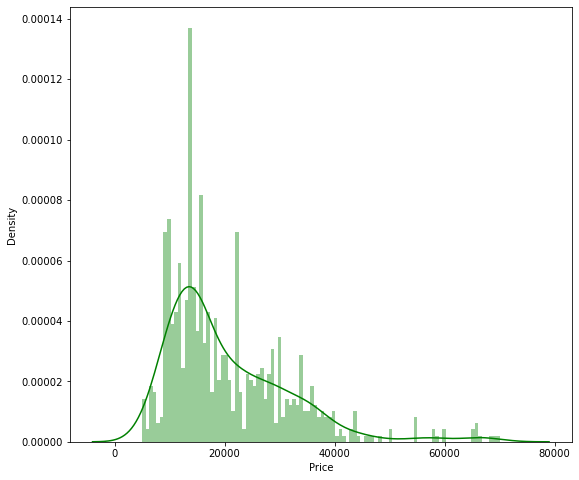

In [56]:
print(wm['Price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(wm['Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

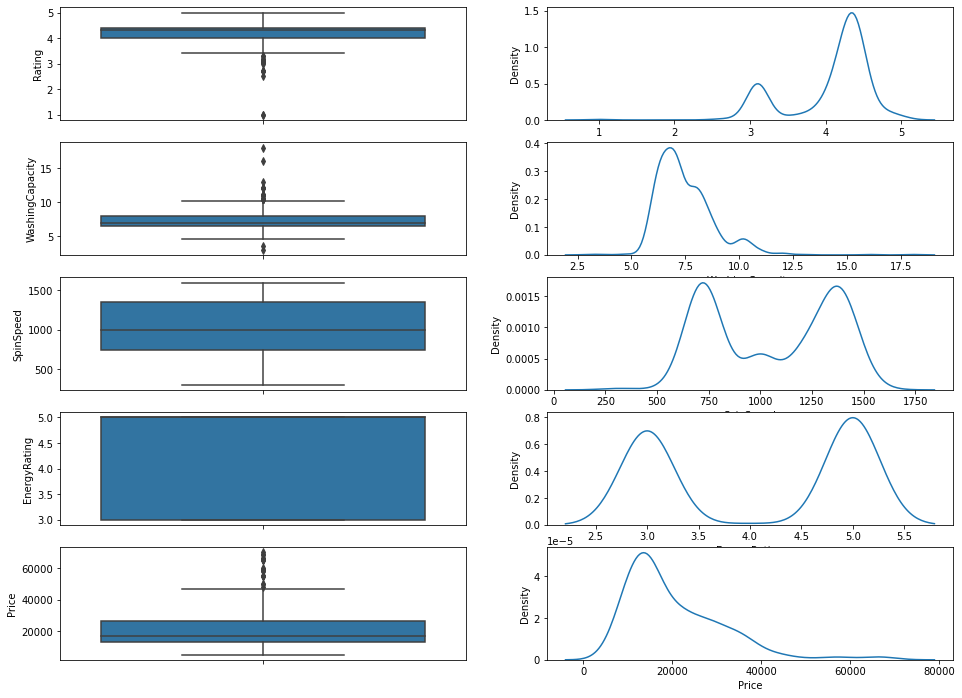

<Figure size 432x288 with 0 Axes>

In [57]:
fig, ax= plt.subplots(5,2, figsize= (16, 12))


sns.boxplot(y=wm.Rating, ax=ax[0,0])
sns.kdeplot(wm.Rating, ax = ax[0,1])
sns.boxplot(y=wm.WashingCapacity, ax=ax[1,0])
sns.kdeplot(wm.WashingCapacity, ax = ax[1,1])
sns.boxplot(y=wm.SpinSpeed, ax=ax[2,0])
sns.kdeplot(wm.SpinSpeed, ax = ax[2,1])
sns.boxplot(y=wm.EnergyRating, ax=ax[3,0])
sns.kdeplot(wm.EnergyRating, ax = ax[3,1])
sns.boxplot(y=wm.Price, ax=ax[4,0])
sns.kdeplot(wm.Price, ax = ax[4,1])
plt.show()
plt.tight_layout()

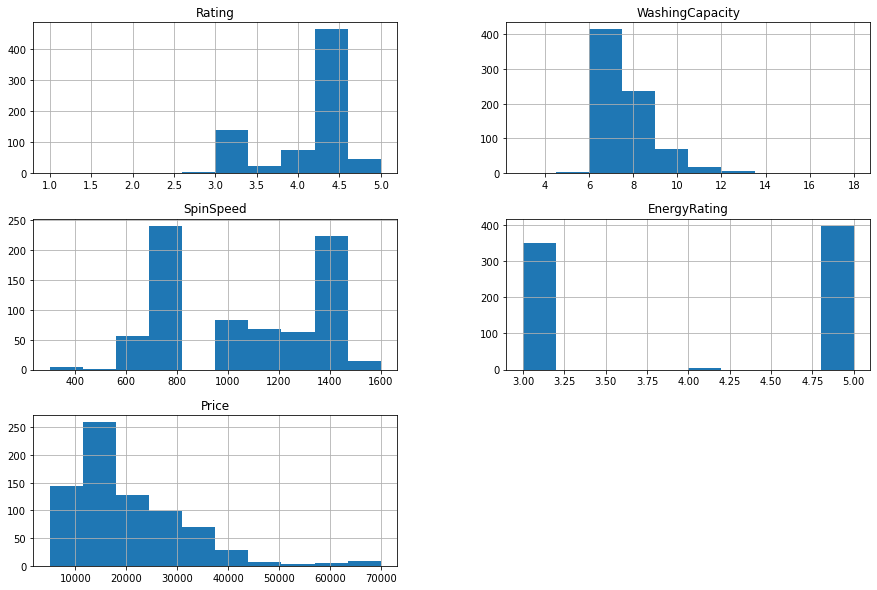

In [58]:
wm.hist(figsize=(15,10),bins=10)
plt.show()

#### Bivariate Analysis:

<Figure size 1440x792 with 0 Axes>

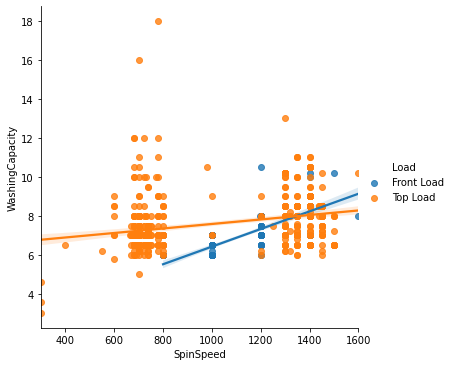

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(20, 11))
sns.lmplot(x='SpinSpeed',y='WashingCapacity',data=wm, hue="Load")
plt.show()
plt.tight_layout()

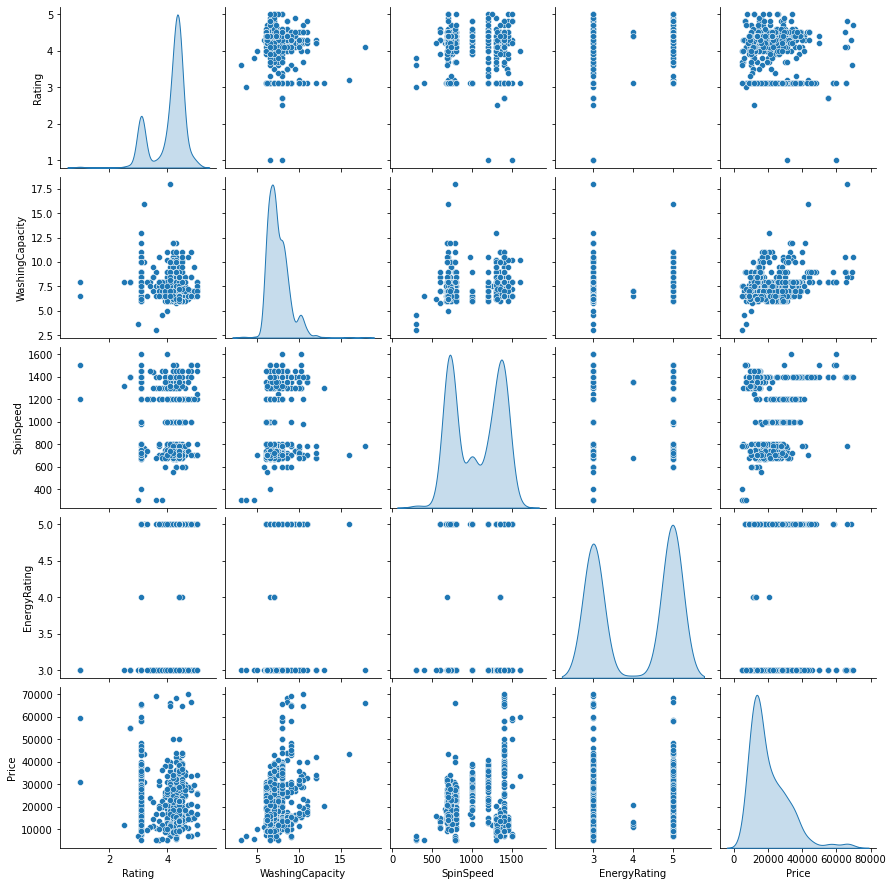

In [60]:
sns.pairplot(wm, diag_kind= 'kde')

In [61]:
profile = ProfileReport(wm, title="FINAL : REPORT", html={'style':{'full_width':True}})

In [62]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]